# STEP 1: Set up your analysis

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Import packages</div></div><div class="callout-body-container callout-body"><p>Add imports for packages that help you:</p>
<ol type="1">
<li>Work with the file system interoperably</li>
<li>Work with vector data</li>
<li>Create interactive plots of vector data</li>
</ol></div></div>

In [2]:
# Interoperable file paths
# Find the home folder
# Work with vector data
# Interactive plots of vector data

import os # Interoperable file paths
import pathlib # Find the home folder

import geopandas as gpd # Work with vector data
import hvplot.pandas # Interactive plots of vector data

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Prepare data directory</div></div><div class="callout-body-container callout-body"><p>In the cell below, <strong>reproducibly and interoperably</strong>
define and create a project data directory somewhere in your home
folder. Be careful not to save data files to your <code>git</code>
repository!</p></div></div>

In [4]:
# Define and create the project data directory
data_dir = os.path.join(
    pathlib.Path.home(),
    'earth-analytics',
    'data',
    'redlining'
)
os.makedirs(data_dir, exist_ok=True)
data_dir

'/Users/brianyandell/earth-analytics/data/redlining'

## STEP 2: Site map

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Define your study area</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Copy the <strong>geopackage</strong> URL for the <a
href="https://dsl.richmond.edu/panorama/redlining/data">University of
Richmond</a></li>
<li>Load the <em>vector</em> data into Python, making sure to cache the
download so you don’t have to run it multiple times.</li>
<li>Create a quick plot to check the data</li>
</ol></div></div>

/var/folders/tt/cyd1sy9s18l1fgc_0ty8l91w0000gn/T/ipykernel_24892/3581258369.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  redlining_gdf.to_file(redlining_path)
/Users/brianyandell/miniconda3/envs/earth-analytics-python/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'city_survey' to 'city_surve'
  ogr_write(
/Users/brianyandell/miniconda3/envs/earth-analytics-python/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'residential' to 'residentia'
  ogr_write(
/Users/brianyandell/miniconda3/envs/earth-analytics-python/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: /Users/brianyandell/earth-analytics/data/redlining/redlining/redlining.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(
Fontconfig wa

<Axes: >

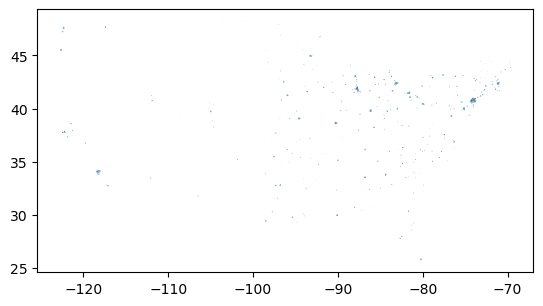

In [5]:
# Define info for redlining download
redlining_url = (
    "https://dsl.richmond.edu/panorama/redlining/static"
    "/mappinginequality.gpkg"
)
redlining_dir = os.path.join(data_dir, 'redlining')
os.makedirs(redlining_dir, exist_ok=True)
redlining_path = os.path.join(redlining_dir, 'redlining.shp')

# Only download once
if not os.path.exists(redlining_path):
    redlining_gdf = gpd.read_file(redlining_url)
    redlining_gdf.to_file(redlining_path)

# Load from file
redlining_gdf = gpd.read_file(redlining_path)

# Check the data
redlining_gdf.plot()

We could overlay the states map using code for instance in
[native-land.ipynb](https://github.com/byandell-Tribal/first-map-template/blob/main/native-land.ipynb).

In [6]:
redlining_gdf

,area_id,city,state,city_surve,category,grade,label,residentia,commercial,industrial,fill,geometry
0,244,Birmingham,AL,True,Best,A,A1,True,False,False,#76a865,"POLYGON ((-86.75678 33.49754, -86.75692 33.495..."
1,193,Birmingham,AL,True,Best,A,A2,True,False,False,#76a865,"POLYGON ((-86.75867 33.50933, -86.76093 33.508..."
2,206,Birmingham,AL,True,Best,A,A3,True,False,False,#76a865,"POLYGON ((-86.75678 33.49754, -86.75196 33.501..."
3,203,Birmingham,AL,True,Still Desirable,B,B1,True,False,False,#7cb5bd,"POLYGON ((-86.80111 33.48071, -86.80099 33.480..."
4,189,Birmingham,AL,True,Still Desirable,B,B10,True,False,False,#7cb5bd,"POLYGON ((-86.74923 33.53333, -86.74916 33.530..."
...,...,...,...,...,...,...,...,...,...,...,...,...
10149,6518,Wheeling,WV,True,Hazardous,D,D4,True,False,False,#d9838d,"POLYGON ((-80.71985 40.06376, -80.71789 40.063..."
10150,6520,Wheeling,WV,True,Hazardous,D,D5,True,False,False,#d9838d,"POLYGON ((-80.72854 40.06729, -80.72837 40.065..."
10151,6516,Wheeling,WV,True,Hazardous,D,D6,True,False,False,#d9838d,"POLYGON ((-80.72216 40.06134, -80.72256 40.060..."
10152,6512,Wheeling,WV,True,Hazardous,D,D7,True,False,False,#d9838d,"POLYGON ((-80.6474 40.04886, -80.64845 40.0487..."


In [9]:
# Download state data using cenpy and read into GeoDataFrame
state_url = "https://www2.census.gov/geo/tiger/TIGER2022/STATE/tl_2022_us_state.zip"
states_gdf = gpd.read_file(state_url)

In [16]:
# Calculate the bounding box
bbox = redlining_gdf.total_bounds
xmin, ymin, xmax, ymax = bbox

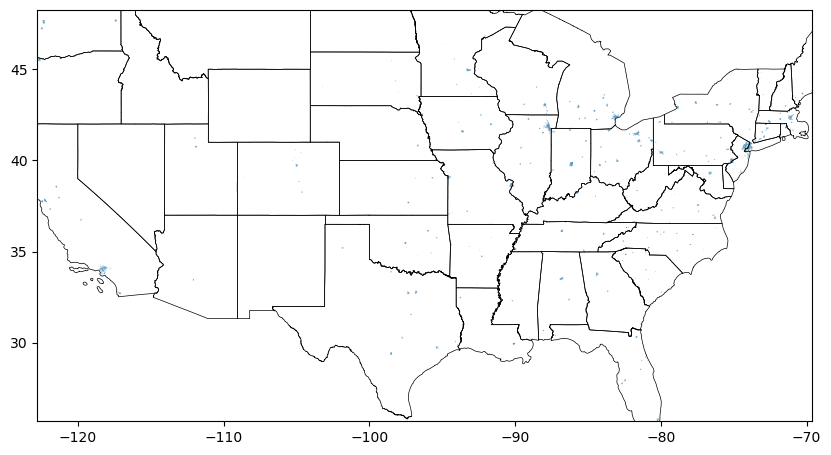

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
states_gdf.boundary.plot(ax=ax, color="black", linewidth=0.5)
redlining_gdf.plot(ax=ax)

# Setting the bounds
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

plt.show()

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Create an interactive site map</div></div><div class="callout-body-container callout-body"><p>In the cell below:</p>
<ol type="1">
<li>Select only the data where the <code>city</code> column is equal to
<code>"Denver"</code>.</li>
<li>For now, dissolve the regions with the <code>.dissolve()</code>
method so we see only a map of Denver.</li>
<li>Plot the data with the <code>EsriImagery</code> tile source basemap.
Make sure we can see your basemap underneath!</li>
</ol></div></div>

In [19]:
denver_redlining_gdf = redlining_gdf[redlining_gdf.city=='Denver']
denver_redlining_gdf.dissolve().hvplot(
    geo=True, tiles='EsriImagery',
    title='City of Denver',
    fill_color=None, line_color='darkorange', line_width=3,
    frame_width=600
)

/Users/brianyandell/miniconda3/envs/earth-analytics-python/lib/python3.11/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-respond"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Reflect and Respond: Write a site description</div></div><div class="callout-body-container callout-body"><p>Your site description should address:</p>
<ol type="1">
<li>Is there anything relevant to this analysis that you notice in your
site map?</li>
<li>Research about the <strong>context</strong> of this analysis. You
could include information about the climate and history of the Denver
area. How might racism, water rights, or other societal forces have
influenced the distribution of urban green space in Denver? Aim for a
paragraph of text.</li>
<li>Citations for the site data and your context sources.</li>
</ol></div></div>

YOUR SITE DESCRIPTION HERE

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Store variables</div></div><div class="callout-body-container callout-body"><p>Store any variables you want for later. This should definitely
include your un-dissolved denver redlining <code>GeoDataFrame</code> and
your data directory path.</p></div></div>

In [20]:
%store denver_redlining_gdf data_dir

Stored 'denver_redlining_gdf' (GeoDataFrame)
Stored 'data_dir' (str)
